<a href="https://colab.research.google.com/github/jaekwonkim-hmc/Data-Analysis-with-Open-Source/blob/main/OSDT_Analysis_mid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

url = 'http://openapi.seoul.go.kr:8088/696d6354746a6165333554747a7744/json/energyUseDataSummaryInfo/1/7/2015/01'
#url = 'http://openapi.seoul.go.kr:8088/sample/xml/CardSubwayStatsNew/1/5/20220301'

#api_key = "696d6354746a6165333554747a7744"
#The the URL request include otions for json, year, month, no of pages & rows. # of rows was changed 5 -> 7

response = requests.get(url)

if response.status_code == 200:
    print("api 호출 성공")
    # Now response.json() should work as the return type is specified as JSON in params
    print(response.json())
else:
    print(f"API 호출 실패: {response.status_code}")


api 호출 성공
{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.

In [1]:
import requests
import pandas as pd
import json

def get_year_months():
    year_months = []
    for year in range(2015, 2024+1):
        for month in range(1,12+1):
            year_months.append(f'{year}/{month:02d}')
    return year_months

responses = []
apiurl='http://openapi.seoul.go.kr:8088/696d6354746a6165333554747a7744/json/energyUseDataSummaryInfo/1/7/'

for year_month in get_year_months():
    url = apiurl+year_month
    response = requests.get(url)
    if response.status_code == 200:
        print(f"API 호출 성공: {year_month}")
        responses.append(response.json()['energyUseDataSummaryInfo']['row'])
    else:
        print(f"API 호출 실패: {response.status_code}")

print(responses)

API 호출 성공: 2015/01
API 호출 성공: 2015/02
API 호출 성공: 2015/03
API 호출 성공: 2015/04
API 호출 성공: 2015/05
API 호출 성공: 2015/06
API 호출 성공: 2015/07
API 호출 성공: 2015/08
API 호출 성공: 2015/09
API 호출 성공: 2015/10
API 호출 성공: 2015/11
API 호출 성공: 2015/12
API 호출 성공: 2016/01
API 호출 성공: 2016/02
API 호출 성공: 2016/03
API 호출 성공: 2016/04
API 호출 성공: 2016/05
API 호출 성공: 2016/06
API 호출 성공: 2016/07
API 호출 성공: 2016/08
API 호출 성공: 2016/09
API 호출 성공: 2016/10
API 호출 성공: 2016/11
API 호출 성공: 2016/12
API 호출 성공: 2017/01
API 호출 성공: 2017/02
API 호출 성공: 2017/03
API 호출 성공: 2017/04
API 호출 성공: 2017/05
API 호출 성공: 2017/06
API 호출 성공: 2017/07
API 호출 성공: 2017/08
API 호출 성공: 2017/09
API 호출 성공: 2017/10
API 호출 성공: 2017/11
API 호출 성공: 2017/12
API 호출 성공: 2018/01
API 호출 성공: 2018/02
API 호출 성공: 2018/03
API 호출 성공: 2018/04
API 호출 성공: 2018/05
API 호출 성공: 2018/06
API 호출 성공: 2018/07
API 호출 성공: 2018/08
API 호출 성공: 2018/09
API 호출 성공: 2018/10
API 호출 성공: 2018/11
API 호출 성공: 2018/12
API 호출 성공: 2019/01
API 호출 성공: 2019/02
API 호출 성공: 2019/03
API 호출 성공: 2019/04
API 호출 성공: 2

In [2]:
df = pd.DataFrame(responses)
print(df.shape)
print(df.values)
#현년 전기, 가스, 수도, 지역난방 에너지 사용량   EUS  GUS   WUS HUS


(120, 7)
[[{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}
  {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.8', 'WUS2': '2133200.8', 'WCO2_1': '-39498.1', 'WCO2_2': '-13113.3692', 'HUS': '0', 'HUS1': '0', 'HUS2': '0', 'HCO2_

In [3]:
# json 데이타를  single list 로 변환
single_list = [item for sublist in responses for item in sublist]

# MM_TYPE='개인' 현년 전기, 가스, 수도, 지역난방 에너지 사용량(EUS GUS WUS HUS) 추출
single_list = [item for item in single_list if item.get('MM_TYPE') == '개인']
df_selected = pd.DataFrame(single_list)[["YEAR","MON","MM_TYPE","CNT","EUS","GUS","WUS","HUS"]]

# 숫자를 글자 -> 수치로 변환
cols_to_convert = ['MON', 'CNT', 'EUS', 'GUS', 'WUS', 'HUS']
df_selected[cols_to_convert] = df_selected[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the selected data
print(df_selected.shape)
display(df_selected.describe())
display(df_selected)

(120, 8)


,MON,CNT,EUS,GUS,WUS,HUS
count,120.000000,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,6.500000,1.060392e+06,2.527874e+08,3.432519e+07,1.415164e+07,1.072995e+07
std,3.466527,1.321069e+05,5.288247e+07,2.565226e+07,1.251391e+06,1.299474e+07
min,1.000000,7.677910e+05,1.348281e+08,5.729131e+06,7.215169e+06,1.585551e+04
25%,3.750000,9.691695e+05,2.187215e+08,1.070171e+07,1.371980e+07,1.346257e+06
50%,6.500000,1.080472e+06,2.460598e+08,2.535242e+07,1.432136e+07,5.627420e+06
75%,9.250000,1.172150e+06,2.698189e+08,5.511033e+07,1.491005e+07,1.895929e+07
max,12.000000,1.251707e+06,4.639713e+08,9.000496e+07,1.661911e+07,1.061349e+08


,YEAR,MON,MM_TYPE,CNT,EUS,GUS,WUS,HUS
0,2015,1,개인,767791,193784708,59133720.0,1.281976e+07,2.274084e+07
1,2015,2,개인,774620,189974230,56487358.0,1.265689e+07,1.879332e+07
2,2015,3,개인,783726,175215719,49984873.0,1.265547e+07,1.382635e+07
3,2015,4,개인,798971,183891769,37306841.0,1.295477e+07,5.836003e+06
4,2015,5,개인,810422,177289769,22060892.0,1.308673e+07,1.320896e+06
...,...,...,...,...,...,...,...,...
115,2024,8,개인,1242696,463971328,7072251.0,1.587354e+07,1.300823e+05
116,2024,9,개인,1247288,409872908,5729131.0,1.514332e+07,3.420507e+06
117,2024,10,개인,1249966,282268119,8233421.0,1.529767e+07,2.695491e+06
118,2024,11,개인,1251707,257927956,17418221.0,1.467867e+07,8.836296e+06


In [4]:
def season(month):
    if month == 12 or month <= 2: return "겨울"
    elif month <= 5: return "봄"
    elif  month <= 8: return "여름"
    elif month <= 11: return "가을"

df_selected['SEASON'] = df_selected['MON'].apply(season)

display(df_selected)

,YEAR,MON,MM_TYPE,CNT,EUS,GUS,WUS,HUS,SEASON
0,2015,1,개인,767791,193784708,59133720.0,1.281976e+07,2.274084e+07,겨울
1,2015,2,개인,774620,189974230,56487358.0,1.265689e+07,1.879332e+07,겨울
2,2015,3,개인,783726,175215719,49984873.0,1.265547e+07,1.382635e+07,봄
3,2015,4,개인,798971,183891769,37306841.0,1.295477e+07,5.836003e+06,봄
4,2015,5,개인,810422,177289769,22060892.0,1.308673e+07,1.320896e+06,봄
...,...,...,...,...,...,...,...,...,...
115,2024,8,개인,1242696,463971328,7072251.0,1.587354e+07,1.300823e+05,여름
116,2024,9,개인,1247288,409872908,5729131.0,1.514332e+07,3.420507e+06,가을
117,2024,10,개인,1249966,282268119,8233421.0,1.529767e+07,2.695491e+06,가을
118,2024,11,개인,1251707,257927956,17418221.0,1.467867e+07,8.836296e+06,가을


In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


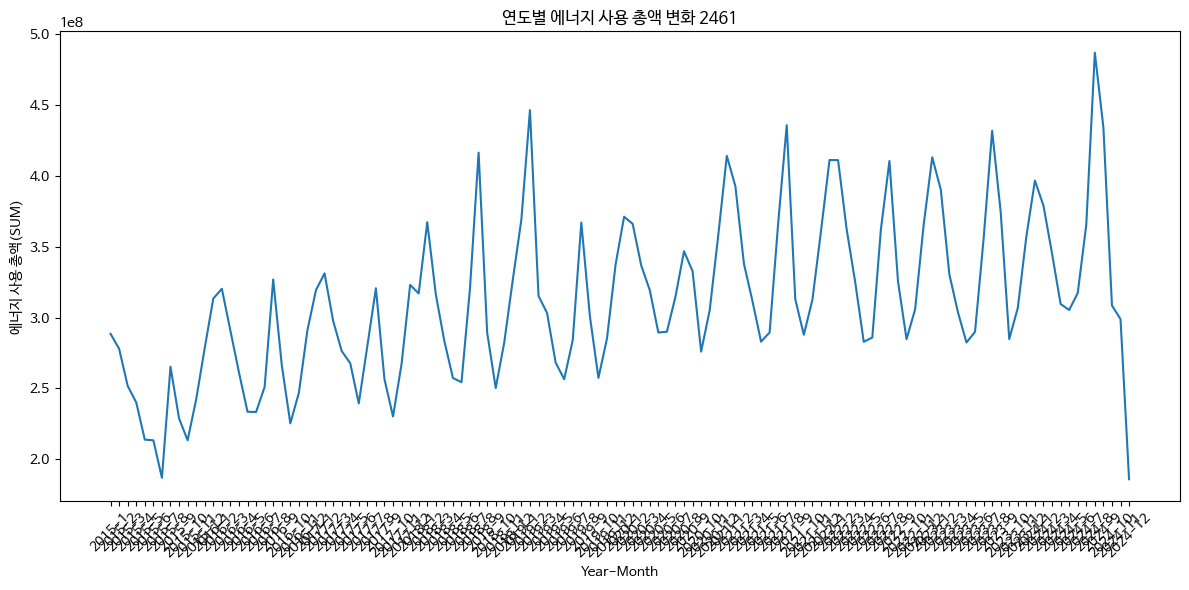

In [6]:
import matplotlib.pyplot as plt
df_selected['SUM']=df_selected['EUS']+df_selected['GUS']+df_selected['WUS']+df_selected['HUS']

# Create a line plot of the 'SUM' column over time (Month)
plt.figure(figsize=(12, 6))
plt.plot(df_selected['YEAR'].astype(str) + '-' + df_selected['MON'].astype(str), df_selected['SUM'])
plt.xlabel('Year-Month')
plt.ylabel('에너지 사용 총액(SUM)')
plt.title('연도별 에너지 사용 총액 변화 2461')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_selected.groupby('SEASON')['GUS'].mean()

,GUS
SEASON,
가을,1.280676e+07
겨울,5.485920e+07
봄,3.880331e+07
여름,1.008365e+07


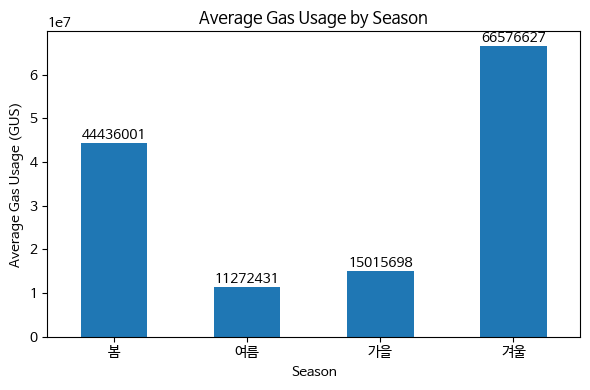

In [15]:
import matplotlib.pyplot as plt

# 가스(GUS)평균 by season
average_gus_by_season = df_selected.groupby('SEASON')['GUS'].mean()

average_gus_by_season = average_gus_by_season.reindex(['봄','여름','가을','겨울'])

# bar plot
plt.figure(figsize=(6,4))
ax = average_gus_by_season.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Gas Usage (GUS)')
plt.title('Average Gas Usage by Season')
plt.xticks(rotation=0)
plt.tight_layout()

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

YEAR
2015    2.899817e+09
2016    3.259907e+09
2017    3.409270e+09
2018    3.682193e+09
2019    3.790736e+09
2020    3.906168e+09
2021    4.105176e+09
2022    4.132556e+09
2023    4.120742e+09
2024    4.132734e+09
Name: SUM, dtype: float64


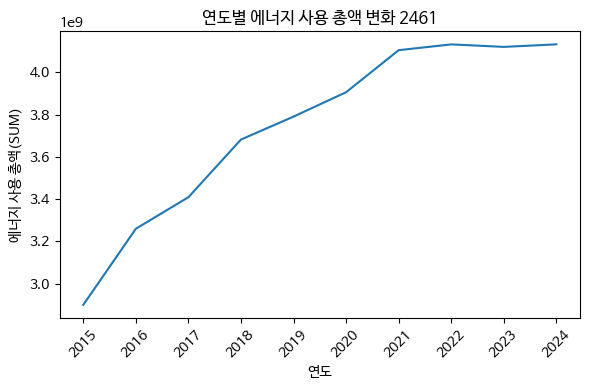

In [14]:
import matplotlib.pyplot as plt

# Calculate the annual sum of energy usage
df_selected['SUM']=df_selected['EUS']+df_selected['GUS']+df_selected['WUS']+df_selected['HUS']
annual_sum_energy_usage = df_selected.groupby('YEAR')['SUM'].sum()

# Display the annual sum of energy usage
print(annual_sum_energy_usage)

# Create a line plot of the 'SUM' column over time (Month)
plt.figure(figsize=(6,4))
plt.plot(annual_sum_energy_usage.index.astype(str), annual_sum_energy_usage.values)
plt.xlabel('연도')
plt.ylabel('에너지 사용 총액(SUM)')
plt.title('연도별 에너지 사용 총액 변화 2461')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()